# Smaller models for the numerical solution of the Poisson Equation.

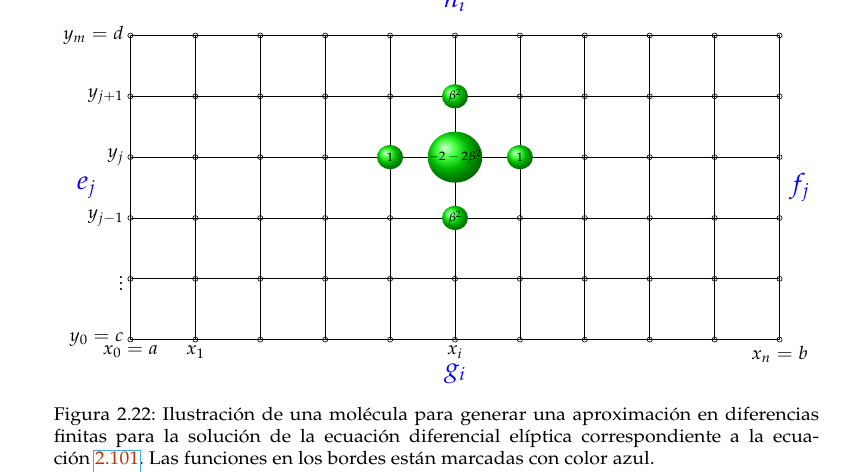

De la clas anterior tenemos que el lado derecho $b$, del sistema $Aw=b$ esta dado por

\begin{eqnarray}
  b_{\ell} =\Delta x^2 \rho_{\ell} - c_{\ell}
  \tag{1}
\end{eqnarray}
donde $c_{\ell}$ es la componente $\ell$ del vector $c$ representado, en
su forma transpuesta, por la siguiente ecuaci'on

\small

$$  c = (e_1 +g_1 \beta^2 \, , \, g_2 \beta^2\, ,\,  \cdots\, ,\,  g_{nx-2} \beta^2\, ,
  \, g_{nx-1} \beta^2 + f_1 \, ,  \, e_2 \, ,  \,  0 \, ,  \, \cdots \, , \, 0 \, ,  \,  
  f_2 \, ,  \, e_3 \, , \,  0 \, ,  \, \cdots \, ,  \,
  0, f_3, \cdots, \cdots,  \nonumber \\
  e_{nx-2} \, , \, 0 \, , \,  \cdots \, , \, 0 \, ,  \, f_{nx-2} \, ,  \, \cdots \, , \,
  e_{ny-1} + h_1 \beta^2  \, ,  \, h_2 \beta^2 \, ,  \, \cdots \, , \,
  h_{nx-2} \beta^2 \, , \,  h_{nx-1} \beta^2 + f_{ny-1}). \nonumber \\
$$

El algoritmo de Gauss-Seidel esta en la clase #5


La dimension mas pequenha que tenga sentido es de una celda interna, y las otras son frontera.

* $nx=1=ny$. (sin contar los bordos)
El resultado (explicado en el tablero) es
$$-2(1 + \beta^2) w_{11} = \Delta x^2 \rho_1 - e_1 -f_1 - g_1 \beta^2 - h_1 \beta^2 $$

Despejamos de aca $w_{11}$.

$$w_{11}= \frac{e_1 + f_1 + \beta^2(g_1 + h_1)}{2(1 + \beta^2)} - \frac{\Delta x^2 \rho_1}{2(1 + \beta^2)}  $$

Si $\rho=0$

$$w_{11}= \frac{e_1 + f_1 + \beta^2(g_1 + h_1)}{2(1 + \beta^2)}  $$
Vemoas que el resultado es un promedio ponderado de los valores de frontera.

Si ademas $\Delta x= \Delta y$, $\beta=1$,

$$w_{11}= \frac{e_1 + f_1 + g_1 + h_1}{2(1 + \beta^2)}  $$
la solucion $w_{11}$ es un promedio aritmetico y esto es lo que hace el Laplaciano. Por esto el Laplaciano actua como un filtro sucavizador.


Segundo caso
*  $nx=1, ny>1$.
El caso $w_{11}$

$$-2( 1 + \beta^2) w_{11} + \beta^2 w_{12} = \Delta x^2 \rho_1 - g_1 \beta^2 - e_1 - f_1  $$

El caso $w_{12}$.
$$  \beta^2 w_{11}-2(1 + \beta^2) w_{12}    = \Delta x^2 \rho_2 - e_2 - f_2$$

$$ \vdots $$

El caso $w_{1 ny-2}$

$$ \beta^2 w_{1 ny-3} -2(1 + \beta^2) w_{1 ny-2}  + \beta^2 w_{ny-1} = \Delta  x^2 \rho_{ny-2} - e_{ny-2} - f_{ny-2}  $$

El caso $w_{1 ny-1}$

$$ \beta^2 w_{1 ny-2}-2(1 + \beta^2) w_{1 ny-1} = \Delta x^2 \rho_{ny-1} - e_{ny-1} - f_{ny-1} - h_1 \beta^2$$

La matriz $A$ es tridiagonal

$$A =
\begin{pmatrix}
-2(1 + \beta^2)  & \beta^2 & 0 & \cdots & \cdots & 0 \\
\beta^2 & -2(1 + \beta^2) & \beta^2 & 0 & \cdots & \vdots \\
0 & \ddots & \ddots & \ddots & \ddots & \vdots \\
0 & \ddots & \ddots & \ddots & \ddots & 0 \\
0 & \ddots & \ddots & \ddots & \ddots & \beta^2 \\
0 & \cdots & \cdots & 0  & \beta^2 & -2(1 + \beta^2)
\end{pmatrix}
$$

El vector vector $b$ esta dado por $\Delta x^2 \rho_i - c_i$.

Donde

$$c_1 = -g_1 \beta^2 -e_1 - f_1 $$
$$c_2 =  -e_2 - f_2 $$
$$c_3 =  -e_3 - f_3 $$
$$ \vdots $$
$$c_{n-2} = -e_{n-2} - f_{n-2} $$
$$c_{n-1} = -e_{n-1} - f_{n-1} - h_1 \beta^2 $$

* Ultimo caso con dos $x$ ocultas (en el medio ) $nx=2$
Veamos esto en dos partes

1. $ny=2$.
Vectorizamos $w_{11} \to w_1$ y asi con los demas

$$-2(1 + \beta^2) w_1  + w_2 + \beta^2 w_3 = \Delta x^2 \rho_1 - e_1 - \beta^2 g_1 $$

Ahora para $w_2$.

$$  w_1 -2(1 + \beta_2) w_2 + \beta^2 w_4 = \Delta x^2 \rho_2 -f_1 -\beta^2 g_2 $$

Ahora para $w_3$.
$$ \beta^2 w_1 -2(1 + \beta^2) w_3 + w_4= \Delta x^2 \rho_3 - e_2 -\beta^2 h_1  $$

Finalmente para $w_4$

$$ \beta^2 w_2 + w_3 -2(1 + \beta^2) w_4 = \Delta x^2 \rho_4  -f_2 - \beta^2 h_2 $$

La matriz para este sistema es

$$ A =
\begin{pmatrix}
-2(1 + \beta^2) & 1 & \beta^2 & 0 \\
1 & -2(1 + \beta^2) & 0 & \beta^2 \\
\beta^2 & 0 & -2(1 + \beta^2) & 1 \\
0 & \beta^2 & 1 & -2 (1 + \beta_2)
\end{pmatrix} $$

Las componentes del vector de la derecah $b_i$ son

$$b_i = \Delta x^2 \rho_i - c_i $$
donde

$$c_1 = e_1 + \beta^2 g_1  $$
$$c_2 = f_1 + \beta^2 g_2  $$
$$c_3 = e_2 + \beta^2 h_1  $$
$$c_4 = f_2 + \beta^2 h_2  $$

De nuevo obserquen que esta matriz se puede escribir en forma de bloques como

$$A =
\begin{pmatrix}
B & \beta^2 I \\
\beta^2 I & B
\end{pmatrix} $$
donde

$$B =
\begin{pmatrix}
\alpha & 1 \\
1 & \alpha
\end{pmatrix}  $$
donde $\alpha = -2(1 + \beta^2).$


2. $ny>2 $.
Para $w_1$

$$ -2(1 + \beta^2) w_1 + w_2 + \beta^2 w_3 = \Delta x^2 \rho_1 - e_1 -\beta^2 g_1   $$


Para $w_2$
$$w_1 -2)1 - \beta^2) w_2 + \beta^2 w_4 = \Delta x^2 \rho_2 - f_1 - \beta^2 g_2  $$

Para $w_3$

$$-2(1 + \beta^2) w_3  + w_4 + \beta^2 w_5=  \Delta x^2 \rho_3 - e_2 $$





Para $w_4$
$$ \beta^2 w_2 + w_3 -2(1 + \beta^2) w_4 + \beta^2 w_6 = \Delta x^2 \rho_3 - f_2$$

$$ \vdots $$
Para $w_{2ny -5}$
$$ \beta^2 w_{2 ny-7} -2(1 + \beta^2) w_{2 ny - 5} + w_{2 ny-4} + \beta^2 w_{2 ny-3}  = \Delta x^2 \rho_{2 ny - 5} - e_{ny -2}  $$

Para $w_{2ny -4}$

$$ \beta^2 w_{2ny - 6} + w_{2ny -5} -2(1 + \beta^2) w_{2 ny -4} + \beta^2 w_{2 ny - 2}  = \Delta x^2 \rho_{2 ny - 4} -f_{ny-2} $$


Para $w_{2ny -3}$

$$ \beta^2 w_{2 ny-5} -2(1 + \beta^2) w_{2 ny-3} + w_{2 ny-2}= \Delta x^2 \rho_{2 ny -3}  - e_{ny-1}$$

por ultimo
Para $w_{2ny -2}$

$$ \beta^2 w_{2 ny-4} + w_{2ny-3} -2(1 + \beta^2) w_{2ny-2} = \Delta x^2 \rho_{2 ny -2} - f_{ny-1} - \beta^2 h_2$$

La matriz $A$ con $\alpha=-2(1 + \beta^2)$ es

$$A =
\begin{pmatrix}
\alpha & 1 & \beta^2 &  0 &  \cdots & \cdots & \cdots & \cdots & 0 \\
1 & \alpha & 0 & \beta^2 & 0 & \cdots & \cdots & \cdots  & \vdots \\
\beta^2 & 0 & \alpha & 1 & \beta^2 & 0 & \cdots & \cdots & \vdots \\
0 & \beta^2 & 1 & \alpha & 0 & \beta^2 & 0 & \cdots & \vdots  \\
\vdots & \ddots & \ddots & \ddots & \ddots & \ddots & \ddots & \ddots & \vdots \\
\vdots & \ddots & \ddots & \ddots & \ddots & \ddots & \ddots & \ddots & 0 \\
\vdots & \cdots & \cdots & 0 & \beta^1 & 1 & \alpha & 0 & \beta^2&  \\
\vdots & \cdots & \cdots & \cdots & 0 & \beta^2 & 0 & \alpha & 1 \\
0 & \cdots & \cdots & \cdots & \cdots & 0 & \beta^2 & 1 & \alpha
\end{pmatrix} $$

El lado derecho es $\Delta x^2 \rho_i - c_i$ donde

$$  c_1 = e_1 + \beta^2 g_1  $$
$$  c_2 = f_1 + \beta^2 g_2  $$
$$ c_3 = e_2$$
$$ c_4 = e_2$$
$$ \vdots $$
$$c_{2ny-5} =  e_{ny-2}  $$
$$c_{2ny-4} =  f_{ny-2}  $$
$$c_{2ny-3} = - e_{ny-1} - \beta^2 h_1  $$
$$c_{2ny-2} = - f_{ny-1} - \beta^2 h_2  $$

Como habiamos observado antes esto se puede ver en cloques como

$$A =
\begin{pmatrix}
B & \beta^2 I & 0 & \cdots & \cdots & 0 \\
\beta^2 I & B & \beta^2 I & \ddots & \cdots & \vdots \\
0 & \beta^2 I & B & \beta^2 I & \ddots & \vdots \\
\vdots & \ddots & \ddots & \ddots & \ddots & 0 \\
\vdots & \ddots & 0  & \beta^2 I & B & \beta^2 I  \\
0 & \cdots & \cdots & 0 & \beta^2 I & B
\end{pmatrix}  $$
donde
$$B = \begin{pmatrix} \alpha &1 \\ 1 & \alpha \end{pmatrix}  $$

Lo que sigue es buscar el algoritmo en `Python`.

Los pasos son:
En la implementacion que vamos a hacer en la segunda parte de esta clase asumimos $nx>2, ny>2$.

1. La diagonal principal

$$ A[i,i] = \alpha, i=0,1, \cdots, N-1$$
donde $N=(nx-1)(ny-1)$

2. Subdiagonales inmediates (encima y debajo)
$ A[i+1, i] = 1$, $A[i,i+1]=1$.  $i=0,1, \cdots, N-2$.
Recurden que algunos de estos van a ser 0 y luego los buscamos.

3. Las diagonales remotas estan a una distancia $nx-1$. Entonces

$$A[i+nx-1, i]=\beta^2, A[i, i+ nx-1]=\beta^2 $$


Ahora hay que buscar los elementos que son 0. Los de abajo (izquierda) corresponden a la frontera con indices $(0, j)$. El $\ell$ indice simple es
$$\ell = (j-1)(nx-1) + i $$
Para $i=0$ tenemos $\ell = (j-1)(nx-1)$. Ahora entonces tenemos que

$$A[\ell, \ell+1] = 0, \ell=(j-1)( nx-1) $$, $j=2,3, \cdots, ny$.
por simetria

$$A[\ell+1, \ell]=A[\ell , \ell+1] $$

Cuando regresemos miramos los $b$'s el lado derecho.
Los $b$ son $\Delta x^2 \rho_\ell - c_\ell$
Los $c_\ell$ toca definirlos. Usamos tres estados. Abajo, en el medio y arriba.

1. La primara capa $j=1$, $c_i=g_i \beta^2$ para $i=1$, para $i=nx-1$ consideramos $f_1$ en vez de $e_1$

2. Capas entre 2 y $ny-2$. Cuando $i=1$ se resta $e_i$ y cuando $i=nx-1$ se resta $f_i$.

3. Arriba en el tope. $j=ny-1$, la signacion es $c_\ell = h_i \beta^2$

## Metodos de prueba
Es bueno saber soluciones analiticas del Laplaciano para poder medir la precision del metodo.

Todas las funciones lineales cumplen el Laplaciano $\nabla^2 u = 0$
A las soluciones del Laplaciano se les llama armonicos. Un armonico es, por ejemplo,

$$ u(x,y) = \frac{y}{(1+x)^2 + y^2}.$$

Con esta solucion es facil hallar $e,f,g,h$.  El dominio para nosotros, en el ejemplo que implementamos es $[0,1] \times [0,1]$.

## Elaboracion del algoritmo

In [1]:
# traemoos el metodo de Gauss-Seidel de la clase 5

# algoritmo para resolver Ax=b usand Gauss-Seidel
# implementacion vectorizada
import numpy as np
from numpy import linalg as LA

def gauss_seidel(A, b, nmax, tol):
    L = np.tril(A) # triangular inferior
    U = A - L # triangular superior
    n = len(b)
    x = np.zeros(n)
    k=0
    error = 10

    # calcule la inversa de la triangular inferior
    LAI = LA.inv(L)

    while ( k < nmax and tol < error):
        xnew = np.dot( LAI, b - np.dot(U, x))
        error = LA.norm(xnew-x)
        # print("solucion x para la iteracion k=%3d con error%5.4f"%(k,error))
        # print("   ", xnew)
        x = xnew
        k += 1

    if k==nmax:
        print("Posiblemente no hay convergencia. Se alcanzaron todas las iteraciones")
    return



def solve_ellipctic(dx, dy, e,f,g,h, a,b,c,d, rho, nmax, tol, verbose):
    nx=int((b-a)/dx)
    ny=int((d-c)/dy)

    # dimension del espacio solucion
    N = (nx-1)*(ny-1)

    # ejes X, Y
    X = np.linspace(a+dx, b-dx, nx-1)
    Y = np.linspace(c+dy, b-dy, ny-1)

    # matriz y vector solucion. Inicializacion
    A = np.zeros( [N, N])
    b = np.zeros(N)

    # imprime tamanho de la matriz
    if verbose:
        print("Tamanho de la matriz A", len(A)**2)
        print("Tamanho del vector b ", len(b))

    # variables intermedias
    beta=dx/dy
    alpha=-2*(1 + beta**2)


    # llenamos la matriz A
    for i in range(N):
        # diagonal princial
        A[i,i] = alpha

    # sudiagonales contiguas
    if i<N-1:
        A[i+1, i] = 1
        A[i, i+1] = 1



    # subdiagonales remotas
    if i <= N-nx:
        A[i+nx-1,i]=beta**2
        A[i, i + nx-1]=beta**2

    # modificar diagonales contiguas con 0s
    for j in range(2, ny):
        l=(j-1)*(nx-1)
        A[l][l-1]= 0
        A[l-1][l]= 0

    # vector b. Dos ciclos
    for j in range(ny-1):
        for i in range(nx-1):
            l = j*(nx-1) + i

            # asignacion inicial de densidades
            rho1 = rho(X[i], Y[j])
            b[l] = dx**2 * rho1

            # primera capa
            if j==0:
                b[l] -= g(X[i])*beta**2

                # esquina inferior izquierda
                if i==0:
                    b[l] -= e(Y[j])
                # esquina inferior derecha
                if i==nx-2:
                    b[l] -= f(Y[j])

            # capas intermedias
            if j>0 and j<ny-2:
                if i==0:
                    b[l] -= e(Y[j])
                if i==nx-2:
                    b[l] -= f(Y[j])

            # ultima capa
            if j==ny-2:
                b[l] -= h(X[i])*beta**2

                # esquina superior izquierda
                if i==0:
                    b[l] -= e(Y[j])
                # esquina superior derecha
                if i==nx-2:
                    b[l] -= f(Y[j])

    # imprima matriaz
    if verbose:
        print("A = \n", A)

    # imprima las fronteras
    if verbose:
        print("e")
        [print(" ", e(y)) for y in Y]
        print("f")
        [print(" ", f(y)) for y in Y]
        print("g")
        [print(" ", g(x)) for x in X]
        print("h")
        [print(" ", h(x)) for x in X]

    # imprima vector b
    if verbose:
        print("\n", b)
        print(b)

    
    # invierta el sistema Ax=b usando Gauss-Seidel
    w = gauss_seidel(A, b, nmax, tol)

    return w


In [2]:
# este es el Laplace mio, no de la clase
def solve_elliptic(dx, dy, e, f, g, h, a, b, c, d, rho, nmax, tol, verbose):
    nx=int( (b-a)/dx)
    ny=int( (d-c)/dy)

    # dimensiones del espacio solucion
    N = (nx-1)*(ny-1)

    # ejes x y y
    X = np.linspace(a+dx, b-dx, nx-1)
    Y = np.linspace(c+dy, d-dy, ny-1)

    # matriz y vector solucion. Inicializacion
    A = np.zeros ( [N,N])
    b = np.zeros(N)

    # print tamanhos
    print("Tamano de la matriz A", len(A)**2)
    print("Tamano del vector b", len(b))

    # variables intermedias
    beta = dx/dy
    alpha=-2.0*(1.0 + beta**2)

    # lleno de la matriz A
    for i in range(N):
        # diagonal principal
        A[i,i] = alpha

        # subdiagonales inmediatas
        if i<N-1:
            A[i+1,i]=1
            A[i,i+1]=1

        # subdiagonales remotas
        if i <= N-nx:
            A[i+nx-1,i]=beta**2
            A[i, i+nx-1]=beta**2

        # modificacion con ceros en diagonales inmediatas
        for j in range(2, ny):
            l=(j-1)*(nx-1)
            A[l][l-1]=0.0
            A[l-1][l]=0.0

        # vector b
        for j in range(ny-1):
            for i in range(nx-1):
                l = (j)*(nx-1) + i
                # print(l)

                # asignacion inicial de densidades
                rhol = rho(X[i], Y[j])
                b[l]=dx**2*rhol

                # primera capa
                if j==0:
                    b[l] -= g(X[i])*beta**2
                    # esquina inferior izquierda
                    if i==0:
                        b[l] -= e(Y[j])
                    # esquina inferior derecha
                    if i==nx-2:
                        b[l] -= f(Y[j])
                # capas intermedias
                if j>0 and j<ny-2:
                   if i==0:
                       b[l] -= e(Y[j])
                   if i==nx-2:
                       b[l] -= f(Y[j])
                # ultima capa
                if j==ny-2:
                   b[l] -= h(X[i])*beta**2
                   # esquina superior izquierda
                   if i==0:
                       b[l] -= e(Y[j])
                   # esquina superior derecha
                   if i==nx-2:
                       b[l] -= f(Y[j])

    # imprim    r matriz
    if verbose:
        print("A=\n",A)

    # print boundaries
    if verbose :
        print("e")
        [ print(" ",e(y)) for y in Y]
        print("f")
        [ print(" ",f(y)) for y in Y]
        print("g")
        [ print(" ",g(x)) for x in X]
        print("h")
        [ print(" ",h(x)) for x in X]

    # imprimir vector b
    if verbose :
        print("\n b")
        print(b)

    # invierta el sistema suand Gauss-Seidel
    w = gauss_seidel(A, b, nmax, tol)



    return w




# prueba
def e(y):
    return y/(1 + y**2)

def f(y):
    return y/(4 + y**2)

def g(x):
    return 0

def h(x):
    return 1/((1+x)**2 + 1)

def rho(x,y):
    return 0

# parametros de frontera y demas
a=0
b=1
c=0
d=1

dx=0.2
dy=0.2

nmax=100
tol=0.001

nx = int((b-a)/dx)
ny = int((d-c)/dy)
xy=np.zeros((nx-1)*(ny-1))

xy = solve_elliptic(dx, dy, e,f,g,h, a,b,c,d, rho, nmax, tol, True)


# matriz solucion en ceros
w = np.zeros([nx+1, ny+1])

# llenar la parte interna de la solucion
# reshape manual
for j in range(1, ny):
    for i in range(1, nx):
        l = (j-1)*(nx-1)+ i-1
        w[i,j] = xy[l]

# ejes X,Y
X = np.linspace(a, b, nx+1)
Y = np.linspace(c, d, ny+1)

# llenar las condiciones de frontera
# abajo y arriba
for i in range(nx+1):
    w[i,0] = g(X[i])
    w[i,nx] = h(X[i])

# izquierda y derecha
for j in range(ny+1):
    w[0,j] = e(Y[j])
    w[ny,j] = f(Y[j])





In [4]:
def e(y):
    return y/(1.  + y**2)

def f(y):
    return y/(4.  + y**2)

def g(x):
    return 0

def h(x):
    return 1/((1+x)**2 +1)

# sin fuente
def rho(x,y):
    return 0

a=0
b=1
c=0
d=1
dx=0.2
dy=0.2

nmax=100
tol=0.001


# xy=np.zeros((nx-1)*(ny-1))
xy = solve_elliptic(dx, dy, e, f, g, h, a, b, c, d, rho, nmax, tol, verbose=True)


nx=int( (b-a)/dx)
ny=int( (d-c)/dy)

# matriz solucion
w = np.zeros([nx+1, ny+1])

# llenar parte interna de la solucion
for j in range(1, nx):
    for i in range(1, ny):
        l = (j-1)*(nx-1) + i-1
        w[i,j]= xy[l]

# ejes x y y
X = np.linspace(a,b,nx+1)
Y = np.linspace(c,d,ny+1)

# llenar las condiciones iniciales
# abajo y arriba
for i in range(nx+1):
    w[i,0] = g(X[i])
    w[i,nx] = h(X[i])

# izquierda y derecha
for j in range(ny+1):
    w[0,j]= e(Y[j])
    w[ny, j]=f(Y[j])



Tamano de la matriz A 256
Tamano del vector b 16
A=
 [[-4.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1. -4.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1. -4.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1. -4.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0. -4.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  1. -4.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  1. -4.  1.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  1. -4.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0. -4.  1.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  1. -4.  1.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  1. -4.  1.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  1. -4.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0. -4.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  1. -4.  1.  0.]
 [ 0.  0.

TypeError: 'NoneType' object is not subscriptable